# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


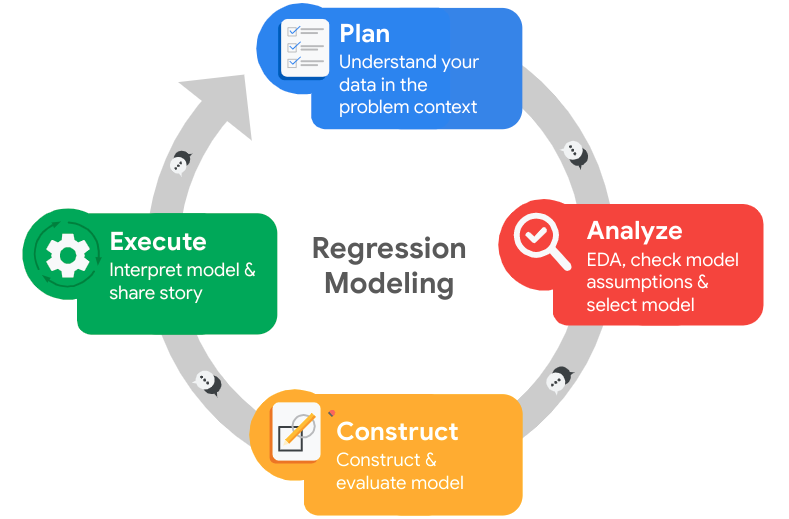

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Stakeholders are the executives in the HR department.

2. Trying to predict whether employees will leave the company or not, to provide insight on what can be done to improve retention

3. fairly large dataset of 15000 entries. Seems liek most important variables will be salary, promotion, and satisfaction level. could be large outliers present in the data. Salary is not a numerical variable but categorical ordinal variable. 

4. PACE strategy doc, Kaggle link to dataset for more info on the data. 

5. Model could be biased, could be large outliers, 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [4]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns = {
    'Work_accident': 'work_accident',
    'Department': 'department',
    'average_montly_hours': 'avg_monthly_hrs',
    'time_spend_company':'tenure',
    'last_evaluation': 'last_eval',
    'satisfaction_level': 'satisfaction'
})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'last_eval', 'number_project', 'avg_monthly_hrs',
       'tenure', 'work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction             0
last_eval                0
number_project           0
avg_monthly_hrs          0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
dupes = df0.loc[df0.duplicated()]
dupes.sort_values(by=['satisfaction','last_eval'])

,satisfaction,last_eval,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
13283,1.00,0.86,2,264,3,0,0,0,IT,medium
13089,1.00,0.88,6,201,4,0,0,0,technical,low
12902,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(df0.shape)
df.shape

(14999, 10)


(11991, 10)

### Check outliers

Check for outliers in the data.

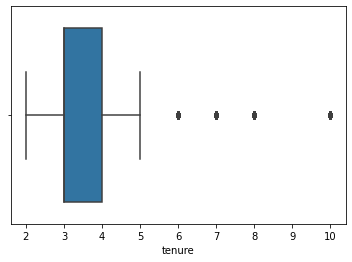

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(df['tenure'])
plt.show()

In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q3 = df['tenure'].quantile(.75)
q1 = df['tenure'].quantile(.25)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound =  q1 - 1.5*iqr
print('Upper bound:', upper_bound)
print('Lower bound:', lower_bound)


outliers = df[(df['tenure'] > upper_bound) | (df['tenure'] < lower_bound)]
print('Number of outliers in tenure:', len(outliers))

Upper bound: 5.5
Lower bound: 1.5
Number of outliers in tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


In [17]:
df = pd.get_dummies(df,columns=['department'])
df.head()

,satisfaction,last_eval,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


In [18]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [19]:
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})
df.head()

,satisfaction,last_eval,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

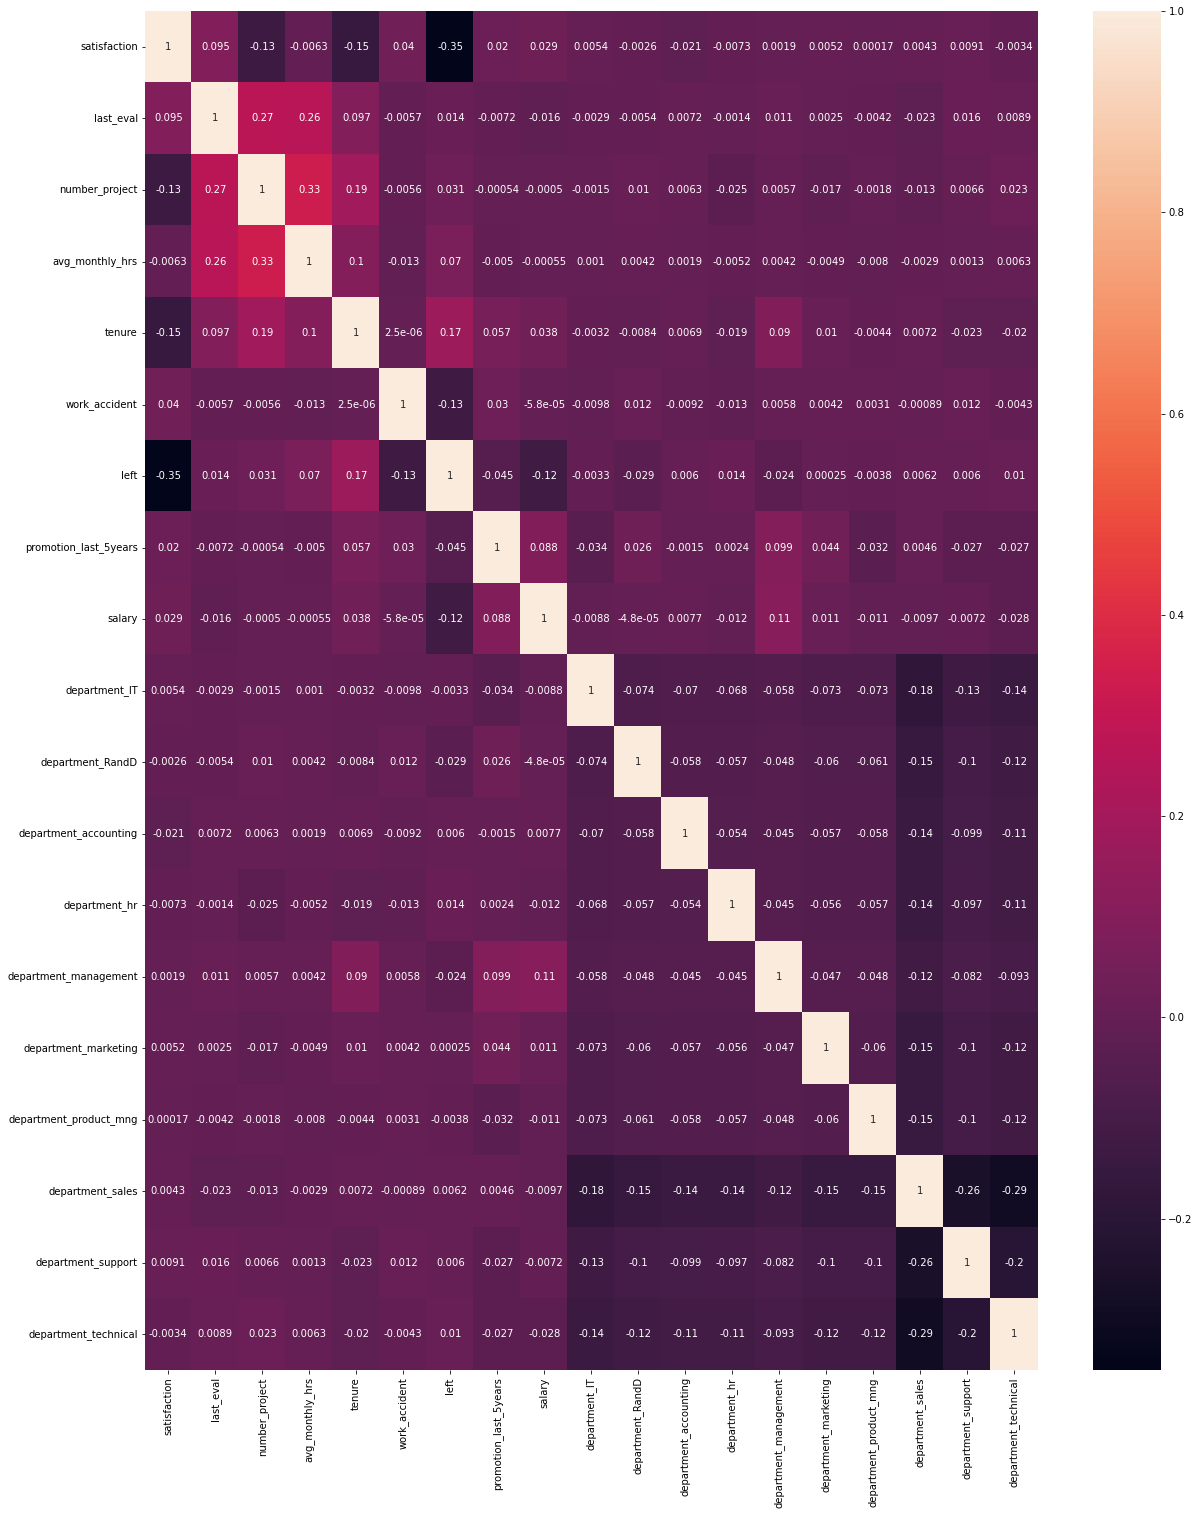

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize= (20,25))
sns.heatmap(df.corr(), annot=True)

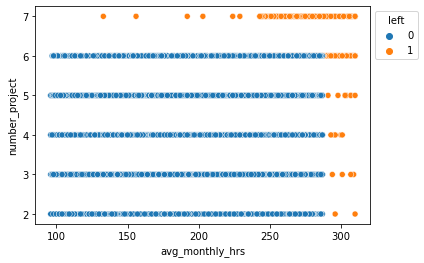

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
ax = sns.scatterplot(data = df, x = 'avg_monthly_hrs', y = 'number_project', hue = 'left')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

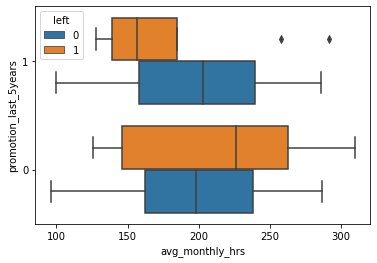

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df, x = 'avg_monthly_hrs', y = 'promotion_last_5years', hue='left', orient='h').invert_yaxis()

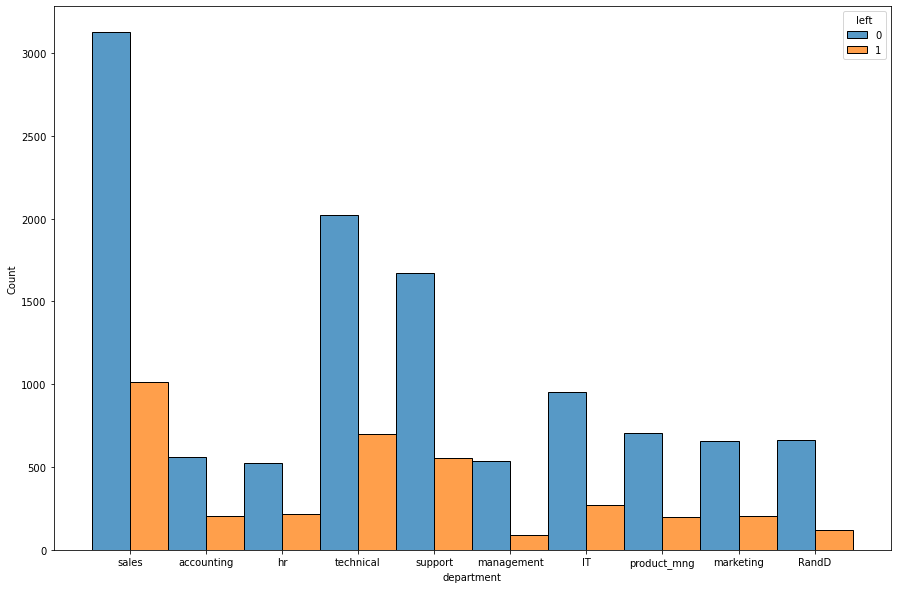

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,10))
sns.histplot(data=df0, x='department', hue= 'left', multiple='dodge')

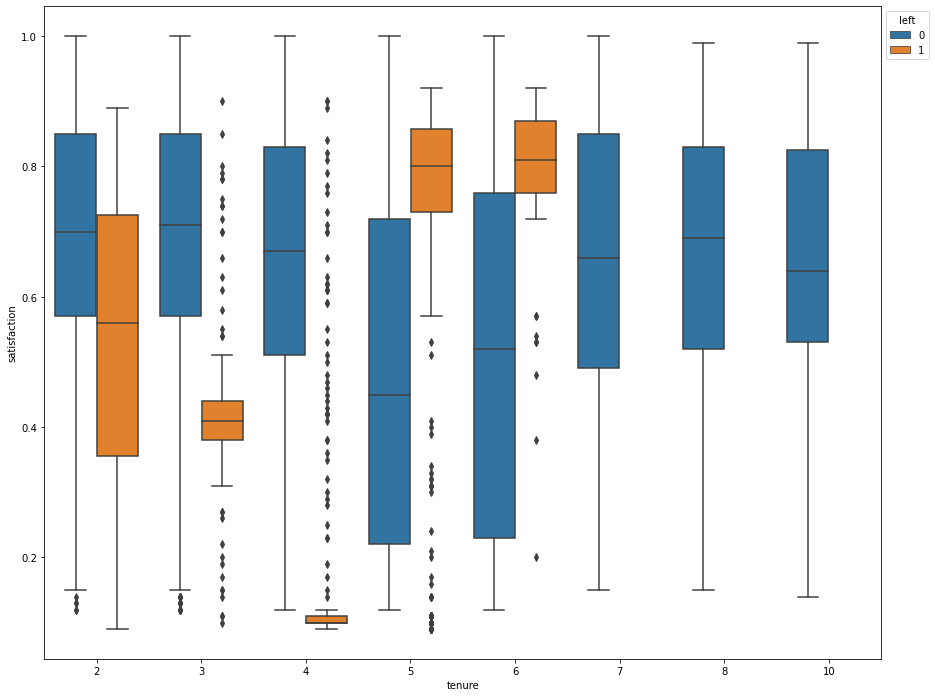

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,12))
ax = sns.boxplot(data=df, x='tenure', y='satisfaction', hue='left')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

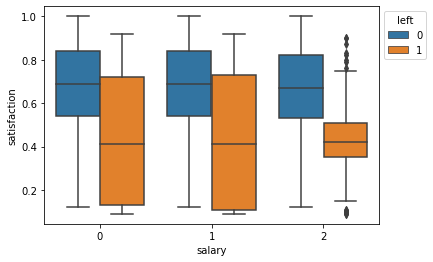

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
ax= sns.boxplot(data=df, x='salary',y='satisfaction', hue='left')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

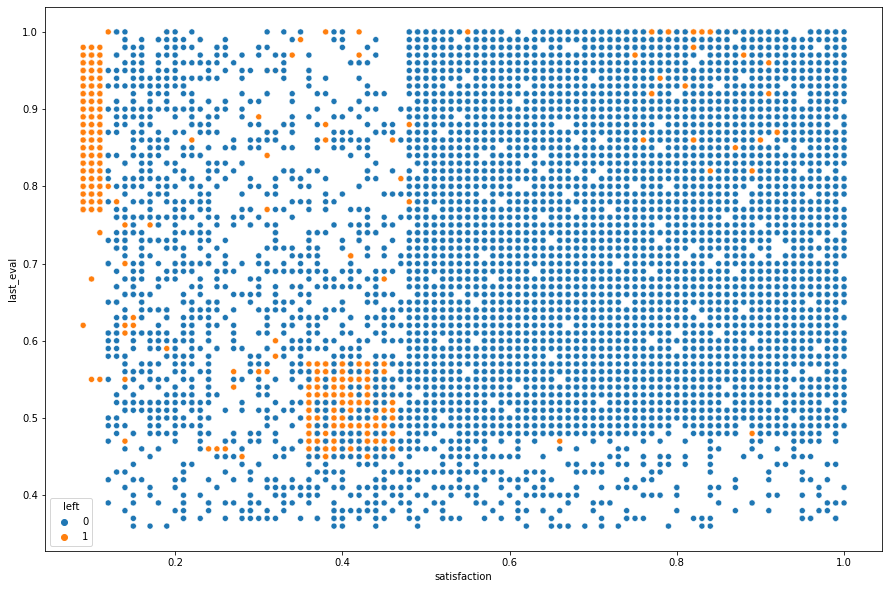

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,10))

sns.scatterplot(data=df, x='satisfaction',y='last_eval', hue='left')

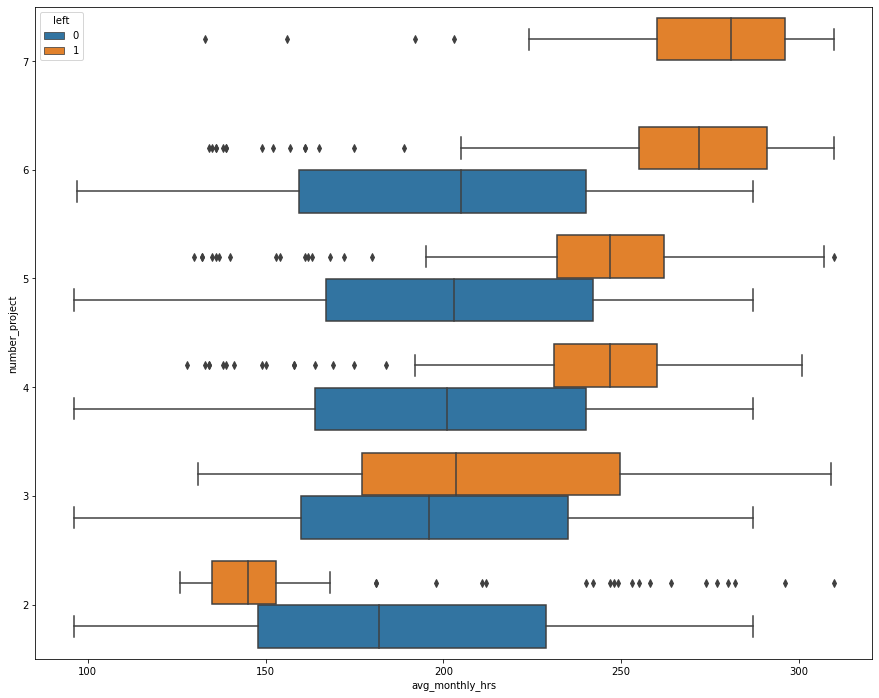

In [24]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df, x= 'avg_monthly_hrs', y='number_project', hue='left', orient='h').invert_yaxis()

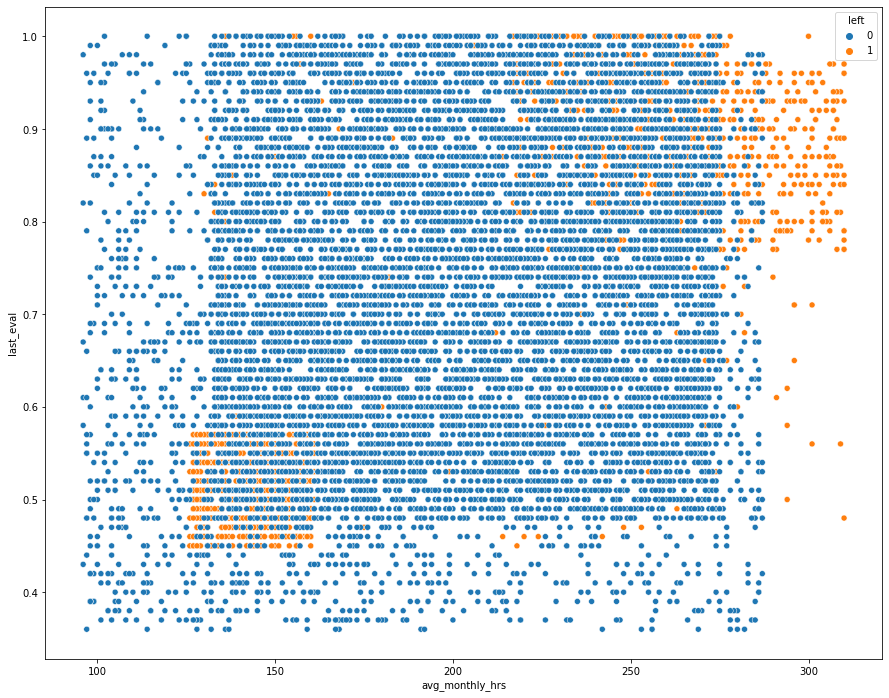

In [25]:
plt.figure(figsize=(15,12))
sns.scatterplot(data=df, x= 'avg_monthly_hrs',y='last_eval',hue='left')

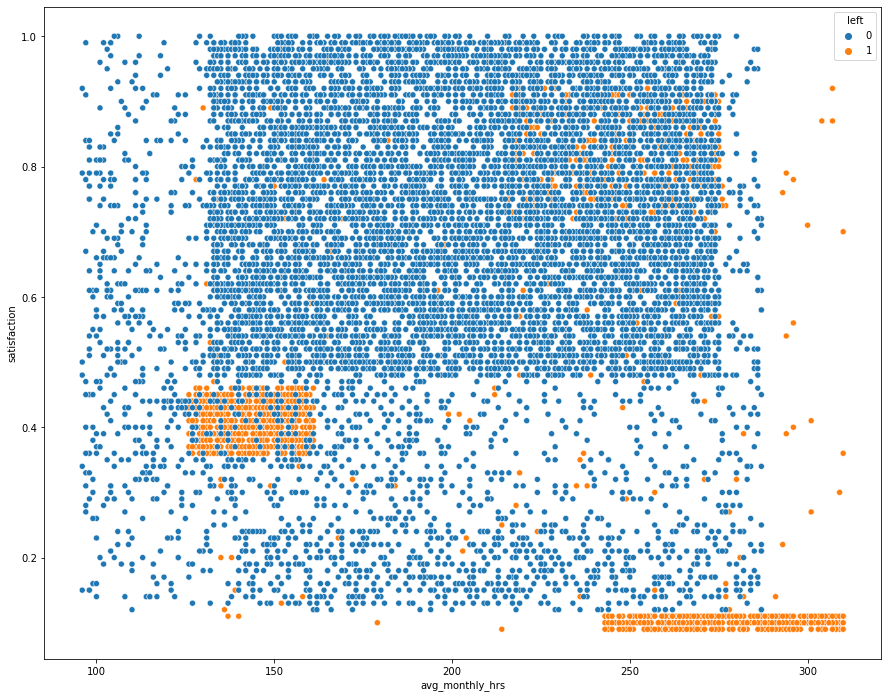

In [26]:
plt.figure(figsize=(15,12))
sns.scatterplot(data=df, x= 'avg_monthly_hrs',y='satisfaction',hue='left')

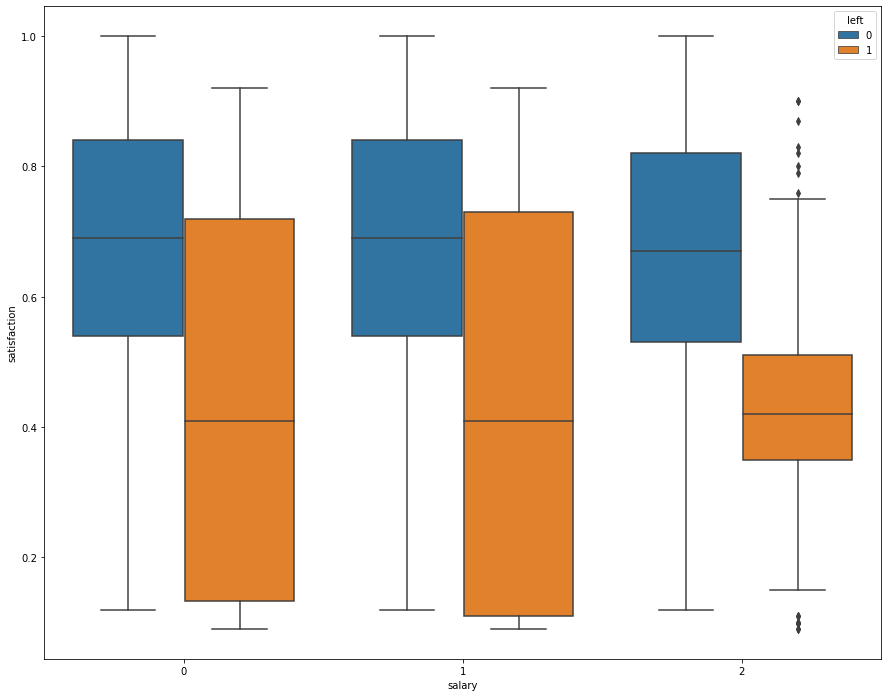

In [27]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df, x='salary',y='satisfaction', hue='left')

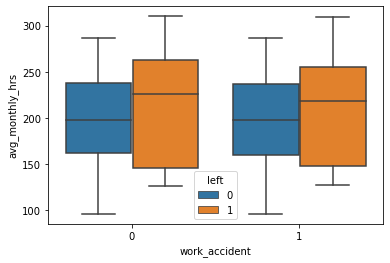

In [28]:
sns.boxplot(data=df, x= 'work_accident', y='avg_monthly_hrs', hue='left')

### Insights

No multicollinearity in data. Low satisfaction correlated with leaving, high avg monthly hrs with lots of projects seems to be correlated with leaving. High avg monthly hrs and no promotion correlated with leaving. High eval and low satisfaction employees likely to leave. group of high monthly hrs/low satisfaction employees leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



No high multicollinearity in the X features already confimed via the correlation heatmap. outcome is categorical(left or stayed with company). Observations are independent, and already have removed the duplicate entries. There are outliers which will be handled before logistic regression model construction. already large datset over 11,000 records.

Still need to confirm the Linear relationship between each X variable and logit of outcome variable

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It is a classification task. whether employees will leave the company or not

### Identify the types of models most appropriate for this task.

Classification task. so my choice of models would be LogisticRegression, Random Forest and XGBoost classifier

### Modeling

Add as many cells as you need to conduct the modeling process.

In [29]:
### Handle outliers for Logistic Regression model

df2 = df.copy()
df2.describe()

,satisfaction,last_eval,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.60387,0.081394,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590,0.273451,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [30]:
# function to handle outliers
# takes, data which is a Dataframe and list of feature names as input

q1 = df2['tenure'].quantile(0.25)
q3 = df2['tenure'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

df_reg = df2[(df2['tenure'] >= lower_bound) & (df2['tenure'] <= upper_bound)]
df_reg.shape

(11167, 19)

In [31]:
X = df_reg.drop('left', axis=1)
y = df_reg['left']

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size = 0.25, stratify = y_tr)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6699, 18)
(6699,)
(2234, 18)
(2234,)
(2234, 18)
(2234,)


In [32]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)


In [33]:
log_preds = log_clf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1857
           1       0.51      0.25      0.33       377

    accuracy                           0.83      2234
   macro avg       0.68      0.60      0.62      2234
weighted avg       0.80      0.83      0.81      2234



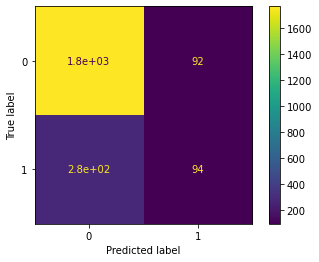

In [35]:
log_cm = confusion_matrix(y_test, log_preds)
log_disp = ConfusionMatrixDisplay(log_cm, display_labels=log_clf.classes_)
log_disp.plot();

This method was not great as the recall or true positive rate is very low. Good at predicting whether employees will stay but not anything else

##  Tree models

In [36]:
X = df.drop('left', axis=1)
y = df['left']

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size= 0.2, stratify= y)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size = 0.25, stratify= y_tr)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(7194, 18)
(7194,)
(2398, 18)
(2398,)
(2399, 18)
(2399,)


In [37]:
rf = RandomForestClassifier()

params = {
    'n_estimators': [500],
    'max_depth': [None]   ,
    'min_samples_split': [6],
    'min_samples_leaf': [1]
}

scoring = ['recall', 'f1', 'precision', 'accuracy']

rf_cv = GridSearchCV(rf, params, scoring=scoring, cv=4, refit='recall')

In [38]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [39]:
rf_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [40]:
rf_pred = rf_cv.best_estimator_.predict(X_test)

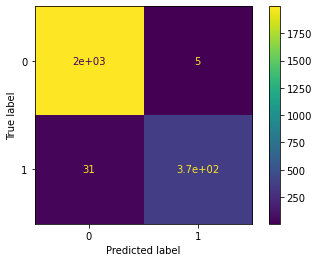

In [41]:
rf_cm = confusion_matrix(y_test, rf_pred)

rf_disp = ConfusionMatrixDisplay(rf_cm, display_labels = rf_cv.best_estimator_.classes_)
rf_disp.plot();

In [42]:
rf_val = rf_cv.best_estimator_.predict(X_val)

rf_results = {
    'Model Name': ['RandomForestClassifier'],
    'Recall': [recall_score(y_val, rf_val)],
    'F1': [f1_score(y_val, rf_val)],
    'Precision': [precision_score(y_val, rf_val)],
    'Accuracy': [accuracy_score(y_val, rf_val)],
}

results = pd.DataFrame(rf_results)
results

,Model Name,Recall,F1,Precision,Accuracy
0,RandomForestClassifier,0.919598,0.949416,0.981233,0.983736


In [43]:
features_importances = pd.DataFrame(list(zip(X_train.columns, rf_cv.best_estimator_.feature_importances_)))
features_importances

,0,1
0,satisfaction,0.322775
1,last_eval,0.124730
2,number_project,0.192767
3,avg_monthly_hrs,0.151503
4,tenure,0.172216
5,work_accident,0.009523
6,promotion_last_5years,0.001440
7,salary,0.009024
8,department_IT,0.001570
9,department_RandD,0.001454


In [44]:
from sklearn.model_selection import RandomizedSearchCV


xgb = XGBClassifier(objective='binary:logistic')

param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3]
}

clf = RandomizedSearchCV(xgb, param_grid, scoring=scoring, cv=3, refit='recall')

clf.fit(X_train, y_train)

clf.best_params_

KeyboardInterrupt: 

In [45]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth = 3)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [46]:
xgb_preds = xgb.predict(X_test)

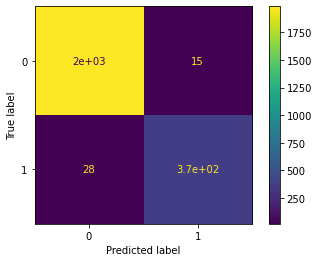

In [47]:
cm = confusion_matrix(y_test, xgb_preds)

disp = ConfusionMatrixDisplay(cm, display_labels = xgb.classes_)

disp.plot()

In [48]:
xgb_val = xgb.predict(X_val)

xgb_results = {
    'Model Name': ['XGBClassifier'],
    'Recall': [recall_score(y_val, xgb_val)],
    'F1': [f1_score(y_val, xgb_val)],
    'Precision': [precision_score(y_val, xgb_val)],
    'Accuracy': [accuracy_score(y_val, xgb_val)],
}

results = pd.concat([results,pd.DataFrame(xgb_results)])

results

,Model Name,Recall,F1,Precision,Accuracy
0,RandomForestClassifier,0.919598,0.949416,0.981233,0.983736
0,XGBClassifier,0.919598,0.942085,0.965699,0.981234


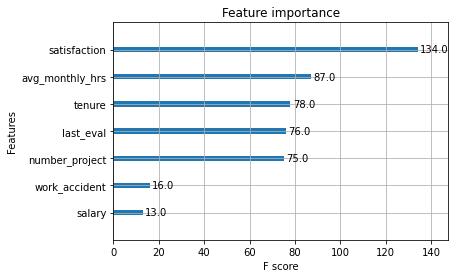

In [49]:
plot_importance(xgb)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



for the random forest model, most important features are satisfaction, last_eval, number_project, avg_monthly_hrs, tenure

for the xgboost classifier model, most important features are satisfaction, avg_monthly_hrs, number_project, tenure, last_eval.

Low satisfaction is the biggest influencee on whether an employee leaves the company, so try to keep employee satisfaction high if you want to retain employees. Make sure to not spread your employees too thin on too many projects, all ppl on 7 projects left the company. This is especially true for newer employees who get overworked, and employees who did not get a promotion in the last 5 years. A majority of employees working average 300 hrs monthly ended up leaving the compnay, so make sure employees stay well below the 300 hrs per month mark. Address why year 4 employees are so dissatisfied. Inform employees about overtime policies. Reward employees for working longer hours or do not require it. 

XGBClassifier model could def be improved with more hyperparameter tuning but it was taking more than 1 hr to run in this limited env. Maybe couldve engineered more features, like avg_monthly_hrs_per_project. 

We could address employees deserving of a raise/promotion which could help retain employees simultaneously. Also we see that salary is not a top factor in leaving so maybe could lead to cost savings. 



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.